In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import tikzplotlib
import sys
import numpy as np
sys.path += ["/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/evaluation_scripts/"]
sys.path

['/Users/yousuf/Workspace/dissertation/code/rPPG/python/notebooks',
 '/private/var/folders/fm/_02hr9211dsd3_6k40xq65qr0000gn/T/56b38575-cb04-4dda-a786-6cd67ffda69a',
 '/Users/yousuf/.vscode/extensions/ms-python.python-2020.5.86806/pythonFiles',
 '/Users/yousuf/.vscode/extensions/ms-python.python-2020.5.86806/pythonFiles/lib/python',
 '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/yousuf/Library/Python/3.7/lib/python/site-packages',
 '/usr/local/lib/python3.7/site-packages',
 '/Users/yousuf/Library/Python/3.7/lib/python/site-packages/IPython/extensions',
 '/Users/yousuf/.ipython',
 '/Users/yousuf/Workspace/dissertation/code/rPPG/python/core/evaluation_scripts/']

[  318   616  1544  3603  5011  6075  8500  8826  9324  9784 10624 10912
 11246 11781 12911 14023 16157 17190 18204 19229]
60.0
LEN: 1942


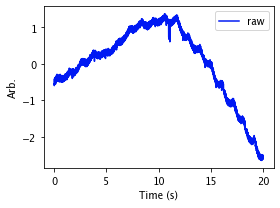

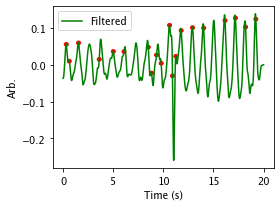

In [3]:
import biosppy
import matplotlib.cm as cm
from matplotlib.patches import Ellipse, Circle
import tikzplotlib as tikz
import hr_eval
import heartpy as hp
examples_path = "/Users/yousuf/Workspace/dissertation/code/examples/"  
# ppg_path = examples_path + f"2_jog_3.csv"
ppg_path = examples_path + f"1_stat_1.csv"
ppg = hr_eval.add_time_to_ppg(hr_eval.get_ppg_signal(ppg_path))
low, high = 40,60
index = (ppg["Time"] > low) & (ppg["Time"] < high)
ppg = ppg[index]
fig, ax = plt.subplots(figsize=(4,3))
x = np.arange(low, high, 1/1000)
y = np.interp(x, ppg["Time"], ppg["PPG"])
cmap = cm.get_cmap('winter')
y = (y-np.mean(y))/np.std(y)
#ax[0].plot(ppg["Time"], ppg["PPG"],label="Raw")
ax.plot(x-low,y, label="raw", color=cmap(0.1))
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Arb.")
plt.tight_layout()



y = (y-np.mean(y))/np.std(y)
sig = (ppg["PPG"]-np.mean(ppg["PPG"]))/np.std(ppg["PPG"])
y = hp.filter_signal(y, [0.7, 3.5], sample_rate=1000, 
                        order=3, filtertype='bandpass')
rpeaks = biosppy.signals.ecg.engzee_segmenter(y)[0]
# ppg_hr.append(mean_heart_rate(signal, ppg_sf))
print(rpeaks)
avg_hr = 60*len(rpeaks)/(high - low)
print(avg_hr)
print(f"LEN: {len(ppg)}")
# circles = ppg.iloc[rpeaks]
times = x[rpeaks]
points = y[rpeaks]
fig, ax = plt.subplots(figsize=(4,3))
for i in range(len(times)):
    ax.add_artist(Ellipse((times[i]-low, points[i]),0.4,0.01, color="r", label="heart beat"))
# a_circle = plt.Circle((circles["Time"], ), .5)

# ax[1].axis("equal")
ax.plot(x-low, y, label="Filtered", color="g")
ax.set_ylabel("Arb.")
ax.set_xlabel("Time (s)")
ax.legend()
ax.plot()
plt.tight_layout()
# ax.plot(ppg["Time"], sig)
tikz.clean_figure()
# tikz.save(prep+"wear_ppg.tex", axis_width='10cm', axis_height='10cm', textsize=8)
# plt.savefig(prep+"wear_ppg.pgf")


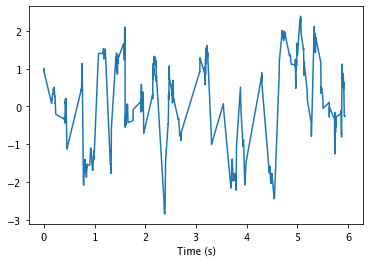

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

examples_path = "/Users/yousuf/Workspace/dissertation/code/examples/"  
ppg_path = examples_path + f"2_jog_1.csv"
ppg = hr_eval.add_time_to_ppg(hr_eval.get_ppg_signal(ppg_path))
low, high = 0, 6
index = (ppg["Time"] > low) & (ppg["Time"] < high)
ppg = ppg[index]
x = np.arange(low, high, 1/1000)
y = np.interp(x, ppg["Time"], ppg["PPG"])
cmap = cm.get_cmap('winter')
y = (y-np.mean(y))/np.std(y)
line, = ax.plot(x-low, y)
ax.set_xlabel("Time (s)")

def init():
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    l = len(y)*i/100
    d = y.copy()
    d[int(l):] = np.nan
    line.set_ydata(d)
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=100)
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("jog-ppg.mp4", writer=writer)


[ 718 1173 1536 2223 2553 3180 3537 3879 4317 4746 5080 5411]
120.0
LEN: 36749


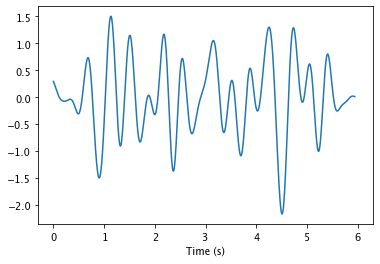

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
sig = (ppg["PPG"]-np.mean(ppg["PPG"]))/np.std(ppg["PPG"])
y = hp.filter_signal(y, [0.7, 3.5], sample_rate=1000, 
                        order=3, filtertype='bandpass')
rpeaks = biosppy.signals.ecg.engzee_segmenter(y)[0]
print(rpeaks)
avg_hr = 60*len(rpeaks)/(high - low)
print(avg_hr)
print(f"LEN: {len(ppg)}")
times = x[rpeaks]
points = y[rpeaks]
line, = ax.plot(x-low, y)
ax.set_xlabel("Time (s)")


def init():
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    l = len(y)*i/100
    d = y.copy()
    d[int(l):] = np.nan
    line.set_ydata(d)
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=100)


from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("jog-ppg-cleaned.mp4", writer=writer)
